## Observations and Insights 

In [1]:
# After generated tables and graphs, I have made a few observations from the data. 



In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from sklearn import datasets
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single dataset
combine_data_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
combine_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice.
#the .count method will include the duplicate
# mice_number = combine_data_df.count()["Mouse ID"]
# mice_number

#.nunique will not include the duplicate
mice_number = combine_data_df.nunique()["Mouse ID"]
mice_number
                            

249

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# instead of showing True/False, we use .loc function to show the actual mosue ID
# adding subset so it doesnt check all the duplicate of all values, so now we only checking mosue ID and timepoint
duplicate_mice = combine_data_df.loc[combine_data_df.duplicated(subset = ["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mice



array(['g989'], dtype=object)

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_df = combine_data_df.loc[combine_data_df['Mouse ID']== 'g989']
duplicate_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

cleaned_df = combine_data_df.loc[combine_data_df['Mouse ID']!= 'g989']
cleaned_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [9]:
# Checking the number of mice in the clean DataFrame.
clean_data_number = cleaned_df.nunique()["Mouse ID"]
clean_data_number
                   



248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# clean_data_mean = cleaned_df["Tumor Volume (mm3)"].mean()
# clean_data_mean

# mean of the tumor volume for each regimen
mean_groupby_tv = cleaned_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
# mean_groupby_tv

# median of the tumor volume for each regimen
median_groupby_tv = cleaned_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
# median_groupby_tv

# variance of the tumor volume for each regimen
var_groupby_tv = cleaned_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
# var_groupby_tv

# standard deviation of the tumor volume for each regimen
sd_groupby_tv = cleaned_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
# sd_groupby_tv

# SEM of the tumor volume for each regimen
sem_groupby_tv = cleaned_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
# sem_groupby_tv



In [11]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.


summary_df = pd.DataFrame({
    "Mean Tumor Volume": mean_groupby_tv,
    "Median Tumor Volume": median_groupby_tv,
    "Tumor Volume Variance": var_groupby_tv,
    "Tumor Volume Std. Dev.": sd_groupby_tv,
    "Tumor Volume Std. Err.": sem_groupby_tv
})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


aggregate_clean_df = cleaned_df.groupby("Drug Regimen").agg({
    "Tumor Volume (mm3)": ['mean', 'median', 'std', 'var', 'sem']
})
aggregate_clean_df

# aggregate-dlfkdfj = clean_df.groupby("drug regimen")
# aggregate-dlfkdfj = aggregate-dlfkdfj.agg("Tumor Volume (mm3)": ['mean', 'median', 'std', 'var', 'sem'])


Tumor Volume (mm3)                                          
                           mean     median       std        var       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  4.994774  24.947764  0.329346
Ceftamin              52.591172  51.776157  6.268188  39.290177  0.469821
Infubinol             52.884795  51.820584  6.567243  43.128684  0.492236
Ketapril              55.235638  53.698743  8.279709  68.553577  0.603860
Naftisol              54.331565  52.509285  8.134708  66.173479  0.596466
Placebo               54.033581  52.288934  7.821003  61.168083  0.581331
Propriva              52.320930  50.446266  6.622085  43.852013  0.544332
Ramicane              40.216745  40.673236  4.846308  23.486704  0.320955
Stelasyn              54.233149  52.431737  7.710419  59.450562  0.573111
Zoniferol             53.236507  51.818479  6.966589  48.533355  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Number of Unique Mice Tested')

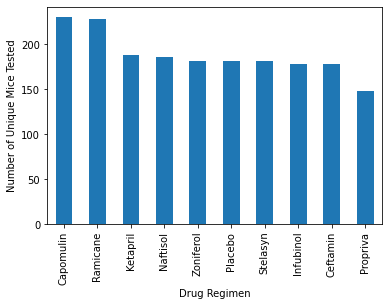

In [13]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

# finding the number of data for each drug regimen
regimen_counts = cleaned_df['Drug Regimen'].value_counts()
# regimen_counts

# alternative method of finding the data for each drug regimen 
# regimen_counts = cleaned_df.groupby("Drug Regimen").count()["Mouse ID"]
# regimen_counts

# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
panda_plot_bar = regimen_counts.plot(kind="bar", figsize=(6,4))

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Mice Tested")





Text(0, 0.5, 'Number of Unique Mice Tested')

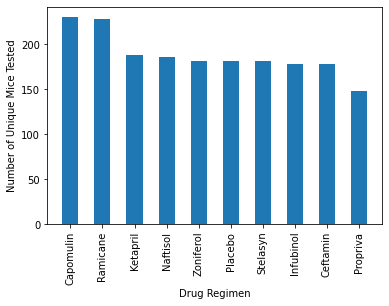

In [14]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.


# finding the number of data for each drug regimen
regimen_counts = cleaned_df['Drug Regimen'].value_counts()
# regimen_counts

# Set the x_axis as length of the regimen counts. Need to import numpy as np above 
x_axis = np.arange(len(regimen_counts))
x_axis

# Setting up tick location and use Index.values attribute to return an array representing the data in the given Index object.
# the index.values function will show the drugs regimen name, as opposed to 1,2,3,4 
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, regimen_counts.index.values)

# creating the bar chart
plt.bar(x_axis, regimen_counts, width = 0.5)

# Rotate the x_axis name to 90 degrees 
plt.xticks(rotation=90)

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Mice Tested")



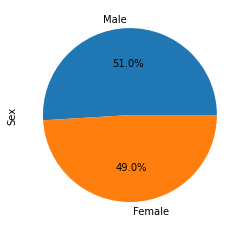

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# perform gender count
gender_counts = cleaned_df["Sex"].value_counts()
# gender_counts


# using panda method to plot
panda_pie_plot = gender_counts.plot(kind="pie", autopct="%1.1f%%")


Text(0.5, 1.0, 'Sex')

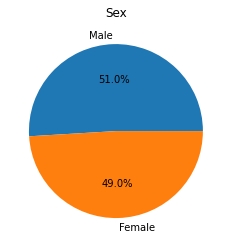

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


# finding how many genders are there
# sex = cleaned_df["Sex"].nunique()


# perform gender count
gender_counts = cleaned_df["Sex"].value_counts()
# gender_counts


# create pie chart 
# adding the .index.values behind the gender_counts to hide the number 
plt.pie(gender_counts, labels=gender_counts.index.values,
        autopct="%1.1f%%")
plt.title('Sex')


# Altnerative fancy way 
# colors = ["lightblue", "orange"]
# explode = (0.1,0)

# plt.pie(gender_counts, explode=explode, labels=gender, colors=colors,
#         autopct="%1.1f%%", startangle=140)

#----------------------------------
# #find the number of female mice and male mice 
# gender_mice = cleaned_df.groupby("Sex").nunique()["Mouse ID"]
# # gender_mice

# # Converting to dataframe, 
# gender_mice_df = gender_mice.to_frame(name="Total Count")
# # gender_mice_df 

# #adding new columns to dataframe and convert to the percentage 
# gender_mice_df["Percentage of Mice"] = (gender_mice_df["Total Count"]/clean_data_number*100).map("{:.1f}%".format)
# gender_mice_df 


## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# finding the max timepoint by Mouse ID
# max_timepoint_df = pd.DataFrame(cleaned_df.groupby('Mouse ID').max()['Timepoint'].sort_values())

max_timepoint_df = pd.DataFrame(cleaned_df.groupby('Mouse ID').max()['Timepoint'])
max_timepoint_df 

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# merging the max timepoint to the dataframe 
merged_df = pd.merge(cleaned_df, max_timepoint_df, how='right', on=['Mouse ID', 'Timepoint'])
merged_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1


In [18]:
# we need 4 drug regimens - Capomulin, Ramicane, Infubinol, and Ceftamin
# Put treatments into a list for for loop (and later for plot labels)

drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Locate each drug from our list of 'drugs' in the orginal dataframe
for drug in drugs:
    drug_df = merged_df.loc[merged_df["Drug Regimen"] == drug, :]
# drug_df.head()
    # only contain final timepoint for each drug regimen 
    final_timepoint_df = drug_df['Timepoint']
# final_timepoint_df.head()   
    tumor_values = drug_df['Tumor Volume (mm3)']
    tumor_vol_data.append(tumor_values)
    # Calculate the IQR and quantitatively determine if there are any potential outliers
    quartiles = tumor_values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
#     print(f'IQR for {drug}: {iqr}')
    # Find upper and lower bounds to help identify outliers for each drug regimen
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
#     print(f'Lower Bound for {drug}: {lower_bound}')
#     print(f'Upper Bound for {drug}: {upper_bound}')
    outliers_check = tumor_values.loc[(drug_df['Tumor Volume (mm3)'] > upper_bound) | 
                                        (drug_df['Tumor Volume (mm3)'] < lower_bound)]
    print(f"{drug}'s potential outliers: {outliers_check}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 74    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


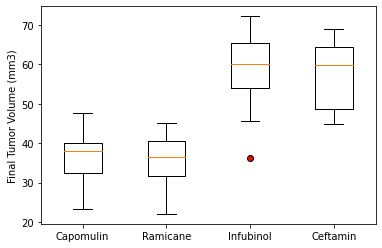

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# worked with Jessica, got below code together
plt.boxplot(tumor_vol_data, flierprops=dict(markerfacecolor="red"))
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.show()

## Line and Scatter Plots

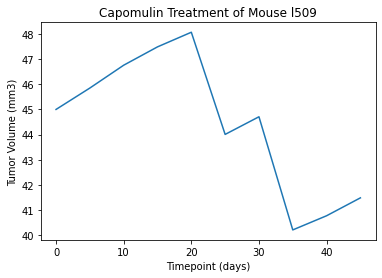

In [20]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin



# finding out what are the mouse that treated with capomulin drug and pick one from the Mouse ID. 
mouse_w_campomulin_df = cleaned_df.loc[cleaned_df['Drug Regimen'] == 'Capomulin']
# mouse_w_campomulin_df

# pick the mouse ID with l509, now we have data of Mouse l509 and is treated by drug Capomulin
mouse_id_w_campomulin = mouse_w_campomulin_df.loc[mouse_w_campomulin_df['Mouse ID'] == 'l509']
# mouse_id_w_campomulin

# plotting the x_axis (timepoint) and y_axis (tumor volume)
plt.plot(mouse_id_w_campomulin['Timepoint'], mouse_id_w_campomulin['Tumor Volume (mm3)'])

# Add labels and title to plot
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse l509")

plt.show()

# Alternative method 
#setting x_axis to be the timepoint of the mouse ID l509
# x_axis = mouse_id_w_campomulin['Timepoint']
# x_axis
# y_axis = mouse_id_w_campomulin['Tumor Volume (mm3)'].map("{:.0f}".format).astype("float")
# # y_axis = mouse_id_w_campomulin['Tumor Volume (mm3)']
# y_axis
# plt.plot(x_axis, y_axis)
# plt.show()

In [21]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# showing data of only Capomulin Regimen
campomulin_regimen_df = cleaned_df.loc[cleaned_df['Drug Regimen'] == 'Capomulin']
# campomulin_regimen_df


# calculating the average tumor volume of mouse that was treated by Capomulin regimen
avg_tumor_vol = campomulin_regimen_df.groupby("Mouse ID").mean()["Tumor Volume (mm3)"]
# avg_tumor_vol

# merging average tumor volumes to the dataframe by Mouse ID 
avg_tumor_vol_df = pd.merge(campomulin_regimen_df, avg_tumor_vol, on='Mouse ID')
# avg_tumor_vol_df

# renamed the columns to Average Tumor Volumes to prevent confusinon 
avg_tumor = avg_tumor_vol_df.rename(columns={"Tumor Volume (mm3)_y": "Average Tumor Volume", 
                                             "Tumor Volume (mm3)_x": "Tumor Volume (mm3)"})
# avg_tumor.head(30)




In [22]:
# we will have to drop out the duplicate 
no_duplicate_df = avg_tumor[['Weight (g)', 'Average Tumor Volume']].drop_duplicates()
no_duplicate_df.head()

# the 0, 10, 18 means when whenever it reaches 10, 18, it is a different Mouse ID number. 
# We are only taking the data of the first mice to present. Not the mice from all timepoint


,Weight (g),Average Tumor Volume
0,17,34.559143
10,15,36.182040
20,17,34.847470
30,17,36.505973
35,17,39.887495


Text(0, 0.5, 'Average Tumor Volume (mm3)')

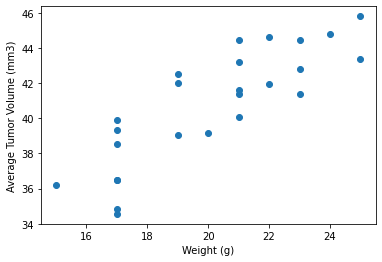

In [23]:
# Setting up the X and Y axis 
x_axis = no_duplicate_df['Weight (g)']
y_axis = no_duplicate_df['Average Tumor Volume']

# making a scatter plot
plt.scatter(x_axis, y_axis)

# giving the name to the x and y label
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")



## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


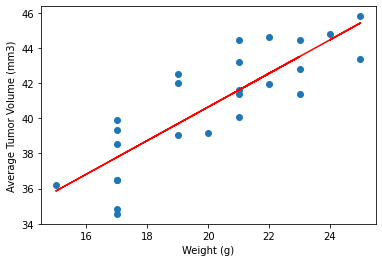

In [24]:
# Calculate the correlation coefficient and linear regression model 

# for mouse weight and average tumor volume for the Capomulin regimen
x_axis = no_duplicate_df['Weight (g)']
y_axis = no_duplicate_df['Average Tumor Volume']

# giving the name to the x and y label
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# ----------------------------above code are from previous scatter plot 

# finding the correlation 
correlation = st.pearsonr(x_axis, y_axis)
correlation
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")
#the correlation coefficient between weight(g)and average tumor volume is 0.84


# go back up and add this -> scipy.stats import linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
# the code below is to show the line equation
# plt.annotate(line_eq,(20,40),fontsize=10,color="red")
plt.show()